In [1]:
import pandas as pd 
import scanpy as sc

In [2]:
meta = pd.read_csv('/Users/christoffer/Downloads/meta (7).tsv', sep = '\t')

In [3]:
meta

,cellId,Expressed Genes,UMI Count,Percent Mitochond.,Louvain Cluster,genes,Sample,Condition,Lesion,Clusters_res08,Celltypes
0,CO28__10X_17_grch38:AAACCTGAGAATCTCCx,2169.0,3451.0,0.011881,10.0,2172,CO28,Ctrl,Ctrl,7,COPs
1,CO28__10X_17_grch38:AAATGCCTCACAACGTx,4306.0,8981.0,0.006903,10.0,4315,CO28,Ctrl,Ctrl,7,COPs
2,CO28__10X_17_grch38:AAGGAGCCACGGCGTTx,1993.0,3003.0,0.008658,10.0,1998,CO28,Ctrl,Ctrl,7,COPs
3,CO28__10X_17_grch38:ACATACGGTCCAACTAx,1938.0,2941.0,0.017001,10.0,1940,CO28,Ctrl,Ctrl,7,COPs
4,CO28__10X_17_grch38:ACATCAGAGCCACGCTx,2403.0,4061.0,0.007387,10.0,2408,CO28,Ctrl,Ctrl,7,COPs
...,...,...,...,...,...,...,...,...,...,...,...
17794,MS121_CA__10X_17_grch38:AGAGCGAAGGCATGTGx,NaN,NaN,NaN,NaN,1480,MS121_CA,MS,CA,3,Astrocytes2
17795,MS121_CA__10X_17_grch38:CCATTCGAGGTGCTAGx,NaN,NaN,NaN,NaN,959,MS121_CA,MS,CA,3,Astrocytes2
17796,MS121_CA__10X_17_grch38:CGGAGTCCAATCCAACx,NaN,NaN,NaN,NaN,974,MS121_CA,MS,CA,3,Astrocytes2
17797,MS121_CA__10X_17_grch38:GCGGGTTTCAGCGACCx,1465.0,2378.0,0.026493,5.0,1499,MS121_CA,MS,CA,3,Astrocytes2


In [4]:
meta = meta.set_index('cellId') 

In [5]:
exp = pd.read_csv('/Users/christoffer/Downloads/exprMatrix (2).tsv.gz', sep = '\t')

In [6]:
exp

,gene,CO28__10X_17_grch38:AAACCTGAGAATCTCCx,CO28__10X_17_grch38:AAATGCCTCACAACGTx,CO28__10X_17_grch38:AAGGAGCCACGGCGTTx,CO28__10X_17_grch38:ACATACGGTCCAACTAx,CO28__10X_17_grch38:ACATCAGAGCCACGCTx,CO28__10X_17_grch38:ACATGGTTCGTATCAGx,CO28__10X_17_grch38:ACCAGTAAGTCGTTTGx,CO28__10X_17_grch38:ACCCACTTCACCCGAGx,CO28__10X_17_grch38:ACGCAGCAGTGACTCTx,...,MS121_NAWM__10X_17_grch38:GGCCGATGTACTTCTTx,MS121_NAWM__10X_17_grch38:GGCTCGATCAGTACGTx,MS121_A3__10X_17_grch38:TTTACTGAGTCGTACTx,MS121_CA__10X_17_grch38:ACATGGTGTTACCGATx,MS121_CA__10X_17_grch38:ACCGTAACATCGTCGGx,MS121_CA__10X_17_grch38:AGAGCGAAGGCATGTGx,MS121_CA__10X_17_grch38:CCATTCGAGGTGCTAGx,MS121_CA__10X_17_grch38:CGGAGTCCAATCCAACx,MS121_CA__10X_17_grch38:GCGGGTTTCAGCGACCx,MS121_CA__10X_17_grch38:TACGGATAGAGCAATTx
0,FO538757.2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AP006222.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,RP5.857K21.4,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,RP11.54O7.3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NOC2L,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21576,BLK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21577,RP11.212I21.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21578,MYH13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21579,GATA4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
exp = exp.set_index('gene')

In [8]:
exp = exp.T

In [52]:
adata = sc.AnnData(X = exp, obs = meta)

In [53]:
adata.layers['raw'] = adata.X.copy()

In [54]:
adata.write('../data/jäkel_et_al_2019.h5ad')

In [56]:
human_genes = [
    "HIF1A",     # Hypoxia inducible factor 1 alpha
    "HK2",       # Hexokinase 2
    "LDHA",      # Lactate dehydrogenase A
    "LDHB",      # Lactate dehydrogenase B
    "MFN1",      # Mitofusin 1
    "MFN2",      # Mitofusin 2
    "OPA1",      # OPA1 mitochondrial dynamin like GTPase
    "PDK1",      # Pyruvate dehydrogenase kinase 1
    "PFKL",      # Phosphofructokinase, liver type
    "PKM",       # Pyruvate kinase M1/2
    "PPARGC1A",  # PGC-1α, transcriptional coactivator
    "SIRT2",     # Sirtuin 2
    "SLC16A1",   # Monocarboxylate transporter 1 (MCT1)
    "SLC16A3"    # Monocarboxylate transporter 4 (MCT4)
]

In [57]:
adata.var

""
gene
FO538757.2
AP006222.2
RP5.857K21.4
RP11.54O7.3
NOC2L
...
BLK
RP11.212I21.2
MYH13


In [58]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [59]:
adata.X.max()

8.574288

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/chr

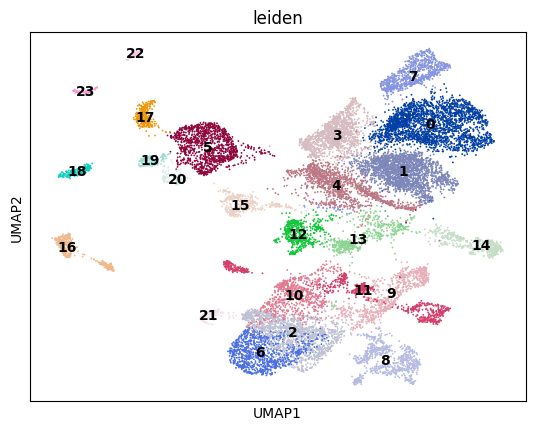

In [69]:
sc.tl.pca(adata, svd_solver="arpack")

# --------- NEIGHBORS / UMAP / CLUSTERS ---------
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)
sc.tl.umap(adata, min_dist=0.4)
sc.tl.leiden(adata, resolution=0.6, key_added="leiden")

# --------- MARKERS (per cluster) ---------
sc.tl.rank_genes_groups(adata, groupby="leiden", method="wilcoxon")

# --------- QUICK PLOTS ---------
sc.pl.umap(adata, color=["leiden"], legend_loc="on data")

/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


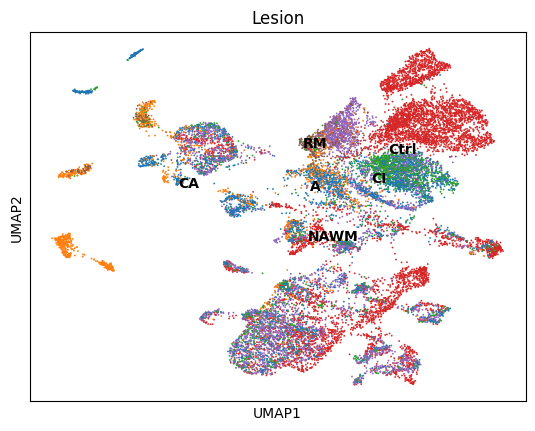

In [71]:
sc.pl.umap(adata, color=["Lesion"], legend_loc="on data")

/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


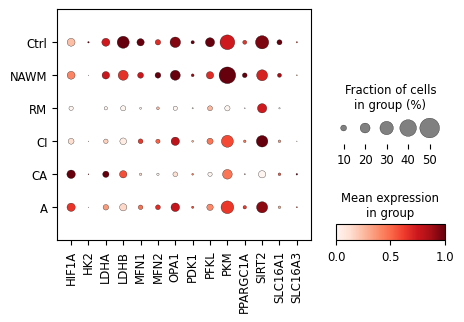

In [44]:
sc.pl.dotplot(
        adata,
        var_names=human_genes,
        groupby="Lesion",
        standard_scale="var",
        #dot_max=0.5,
        #dot_min=0.05,
        color_map="Reds",
        dendrogram=False,
        figsize=(5, 3),
        categories_order=['Ctrl','NAWM','RM','CI','CA','A'],
        title=''
    )

In [60]:
# ============================================
# Dot plot across TIMEPOINTS (single-cell)
# mean (color) + % expressing (size)
# ============================================
import numpy as np, pandas as pd
import scipy.sparse as sp
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Optional, List, Tuple

# -------- helpers --------
def _to_dense(X): return X.toarray() if sp.issparse(X) else np.asarray(X)

def _get_expr_matrix(adata, layer=None):
    X = adata.layers[layer] if (layer is not None and layer in adata.layers) else adata.X
    return _to_dense(X)

def _ensure_genes_present(adata, genes):
    pres = [g for g in genes if g in adata.var_names]
    miss = [g for g in genes if g not in adata.var_names]
    if miss: print(f"[warn] skipping {len(miss)} missing genes:", miss[:20], "..." if len(miss)>20 else "")
    return pres

# -------- summaries (per timepoint) --------
def summarize_by_time(
    adata, genes, celltype,
    time_col="timepoint",
    ct_col="cell_type",
    layer=None,
    detect_threshold=0.0,
    time_order: Optional[List[str]] = None
) -> pd.DataFrame:
    """Return tidy table with columns: cell_type, time, gene, mean, pct_expressing, n_cells."""
    genes = _ensure_genes_present(adata, genes)
    if not genes: return pd.DataFrame()

    mask = adata.obs[ct_col].astype(str).eq(celltype) & adata.obs[time_col].notna()
    sub = adata[mask, genes]
    if sub.n_obs == 0:
        print(f"[warn] no cells for {celltype}")
        return pd.DataFrame()

    X = _get_expr_matrix(sub, layer=layer)
    df = pd.DataFrame(X, index=sub.obs_names, columns=genes)
    df["time"] = sub.obs[time_col].astype(str).values

    if time_order is None:
        # keep alphanumeric order
        time_order = sorted(df["time"].unique(), key=lambda s: (len(s), s))

    rows = []
    for t in time_order:
        dt = df[df["time"] == t]
        if dt.empty: continue
        for g in genes:
            vals = dt[g].astype(float).values
            rows.append({
                "cell_type": celltype,
                "time": t,
                "gene": g,
                "mean": float(vals.mean()),
                "pct_expressing": float((vals > detect_threshold).mean()),
                "n_cells": int(len(vals))
            })
    out = pd.DataFrame(rows)
    if out.empty: return out
    out["time"] = pd.Categorical(out["time"], categories=time_order, ordered=True)
    return out.sort_values(["gene","time"])

def compute_zscores_vs_baseline(df: pd.DataFrame, baseline_time: Optional[str] = None) -> pd.DataFrame:
    """Add z-scores per gene across time; if baseline_time given, add z_vs_baseline anchored there."""
    if df.empty: return df.copy()
    out = df.copy()

    # variance across time per gene
    sd_by_gene = out.groupby(["gene"])["mean"].std(ddof=1).replace(0, np.nan)
    mean_by_gene = out.groupby(["gene"])["mean"].mean()

    out = out.join(sd_by_gene.rename("sd_gene"), on="gene")
    out = out.join(mean_by_gene.rename("mean_gene"), on="gene")

    out["z_within_gene"] = ((out["mean"] - out["mean_gene"]) / out["sd_gene"]).replace([np.inf,-np.inf], np.nan).fillna(0.0)

    if baseline_time is not None:
        base = (out.loc[out["time"].astype(str)==str(baseline_time), ["gene","mean"]]
                  .drop_duplicates("gene").rename(columns={"mean":"mean_baseline"}).set_index("gene"))
        out = out.join(base, on="gene")
        out["z_vs_baseline"] = ((out["mean"] - out["mean_baseline"]) / out["sd_gene"])\
                                 .replace([np.inf,-np.inf], np.nan).fillna(0.0)
    return out

# -------- pretty dotplot --------
def plot_dotplot_time(
    df: pd.DataFrame,
    title: str = "Dotplot across time",
    color_mode: str = "log1p_mean",    # "mean" | "log1p_mean" | "z_within_gene" | "z_vs_baseline"
    cmap: Optional[str] = None,
    size_range: Tuple[int,int] = (20, 300),
    sort_genes: Optional[str] = "mean",   # "mean" | "pct" | "z" | "name" | None
    sort_genes_time: Optional[str] = None,
    vmin: Optional[float] = None,
    vmax: Optional[float] = None,
):
    if df.empty:
        print("[warn] nothing to plot")
        return

    plot_df = df.copy()
    # choose color values
    if color_mode == "log1p_mean":
        plot_df["color_val"] = np.log1p(plot_df["mean"]); cmap = cmap or "rocket_r"; cbar_label="log1p(mean)"
    elif color_mode == "mean":
        plot_df["color_val"] = plot_df["mean"]; cmap = cmap or "rocket_r"; cbar_label="mean"
    elif color_mode == "z_within_gene":
        assert "z_within_gene" in plot_df.columns, "run compute_zscores_vs_baseline first"
        plot_df["color_val"] = plot_df["z_within_gene"]; cmap = cmap or "coolwarm"; cbar_label="z (within gene)"
    elif color_mode == "z_vs_baseline":
        assert "z_vs_baseline" in plot_df.columns, "run compute_zscores_vs_baseline(..., baseline_time=...) first"
        plot_df["color_val"] = plot_df["z_vs_baseline"]; cmap = cmap or "coolwarm"; cbar_label="z vs baseline"
        if vmin is None or vmax is None:
            m = np.nanmax(np.abs(plot_df["color_val"].values)); vmin, vmax = -m, m
    else:
        raise ValueError("bad color_mode")

    # gene sorting
    if sort_genes in {"mean","pct","z"}:
        metric = {"mean":"mean", "pct":"pct_expressing", "z":"color_val"}[sort_genes]
        if sort_genes_time is None:
            order = plot_df.groupby("gene")[metric].mean().sort_values(ascending=False).index.tolist()
        else:
            sub = plot_df.loc[plot_df["time"].astype(str)==str(sort_genes_time)]
            order = sub.groupby("gene")[metric].mean().sort_values(ascending=False).index.tolist()
        plot_df["gene"] = pd.Categorical(plot_df["gene"], categories=order, ordered=True)
    elif sort_genes == "name":
        plot_df["gene"] = pd.Categorical(plot_df["gene"], categories=sorted(plot_df["gene"].unique()), ordered=True)

    plot_df["pct_plot"] = plot_df["pct_expressing"] * 100.0

    fig_w = max(3, 0.9 * plot_df["time"].nunique())
    fig_h = 0.25 * plot_df["gene"].nunique() + 2.5
    plt.figure(figsize=(fig_w + 1.5, fig_h))   # widen a bit
    ax = sns.scatterplot(
        data=plot_df,
        x="time", y="gene",
        size="pct_plot", sizes=size_range,
        hue="color_val", palette=cmap,
        edgecolor="0.25", linewidth=0.3, alpha=0.95,
        zorder=2, clip_on=False   # <-- don't crop markers at axes
    )
    
    # add some margins so dots have space
    plt.margins(x=0.2, y=0.05)
    ax.invert_yaxis()
    ax.set_xlabel("Timepoint")
    ax.set_ylabel("")
    ax.set_title(title, weight="bold")

    # colorbar
    norm = plt.Normalize(vmin if vmin is not None else plot_df["color_val"].min(),
                         vmax if vmax is not None else plot_df["color_val"].max())
    sm = plt.cm.ScalarMappable(cmap=sns.color_palette(cmap, as_cmap=True), norm=norm)
    sm.set_array([])
    cbar = ax.figure.colorbar(sm, ax=ax, pad=0.02, fraction=0.03, aspect=20)
    cbar.set_label(cbar_label)

    # size legend
    for leg in ax.get_legend_handles_labels()[0:1]: pass
    if ax.get_legend(): ax.get_legend().remove()
    pct_levels = (10, 50, 90)
    handles = [plt.Line2D([0],[0], marker='o', linestyle='', markerfacecolor='none',
                          markeredgecolor='0.4', markersize=np.interp(p,[0,100], [np.sqrt(size_range[0]/np.pi)*2,
                                                                                  np.sqrt(size_range[1]/np.pi)*2]))
               for p in pct_levels]
    ax.legend(handles, [f"{p}%" for p in pct_levels], title="% expressing",
              frameon=False, loc="upper left", bbox_to_anchor=(1.02, 1.0), fontsize=9, title_fontsize=10)

    ax.grid(True, axis="x", color="0.92", lw=0.7)
    plt.xticks(rotation=35, ha="right")
    
    # italicize gene names
    for lab in ax.get_yticklabels():
        lab.set_fontstyle("italic")
    
    plt.tight_layout()
    plt.show()

In [61]:
# Collapse fine-grained celltypes into broader categories
collapse_map = {
    "Neuron1": "Neuron",
    "Neuron2": "Neuron",
    "Neuron3": "Neuron",
    "Neuron4": "Neuron",
    "Neuron5": "Neuron",
    
    "Oligo1": "Oligodendrocyte",
    "Oligo2": "Oligodendrocyte",
    "Oligo3": "Oligodendrocyte",
    "Oligo4": "Oligodendrocyte",
    "Oligo5": "Oligodendrocyte",
    "Oligo6": "Oligodendrocyte",
    "OPCs": "OPC",
    "COPs": "OPC",   # or keep separate if you prefer
    
    "Astrocytes": "Astrocyte",
    "Astrocytes2": "Astrocyte",
    
    "Pericytes": "Vascular",
    "Endothelial_cells1": "Vascular",
    "Endothelial_cells2": "Vascular",
    "Vasc_smooth_muscle": "Vascular",
    
    "Macrophages": "Immune",
    "Immune_cells": "Immune",
    "Microglia_Macrophages": "Microglia",
    "ImOLGs": "Immune"  # or Oligo-like immune? depends on context
}

# Apply mapping
adata.obs["Celltypes_simplified"] = adata.obs["Celltypes"].replace(collapse_map)

# Check results
print(adata.obs["Celltypes_simplified"].value_counts())

Celltypes_simplified
Oligodendrocyte    7973
Neuron             5031
Vascular           1533
Astrocyte          1242
Immune              791
OPC                 594
Microglia           428
ImOlGs              207
Name: count, dtype: int64


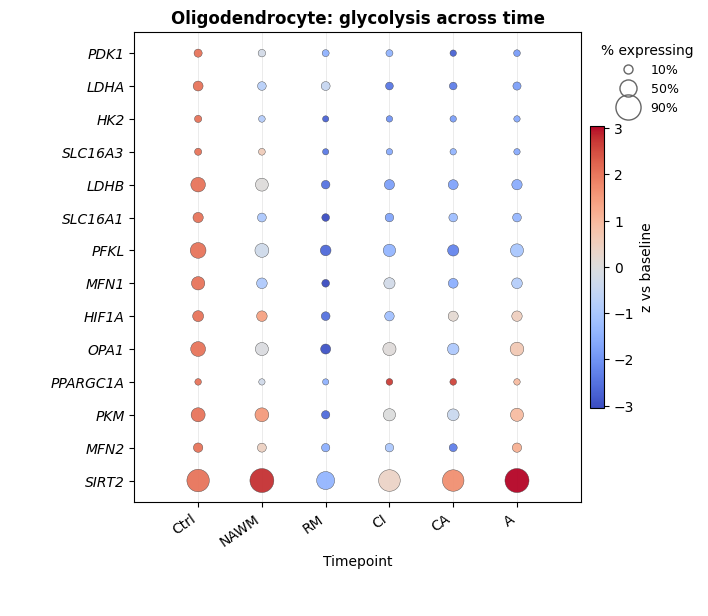

In [67]:
celltype = "Oligodendrocyte"
time_col = "Lesion"      # e.g., values: "T0","T1","T2","T3"
ct_col   = "Celltypes_simplified"
layer    = 'raw'               # or name of your expression layer

# 1) summarize
tbl = summarize_by_time(adata, human_genes, celltype, time_col=time_col, ct_col=ct_col, layer=layer,
                        detect_threshold=0.0, time_order=['Ctrl','NAWM','RM','CI','CA','A'])

# 2) z-scores (optional): anchor at baseline T0
tblz = compute_zscores_vs_baseline(tbl, baseline_time="Ctrl")

# 3) plot
plot_dotplot_time(tblz,
                  title=f"{celltype}: glycolysis across time",
                  color_mode="z_vs_baseline",   # or "log1p_mean"
                  sort_genes="z",               # or "mean"/"pct"/"name"/None
                  sort_genes_time="A")         # bin used for ranking